In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import datetime

In [11]:
df = pd.read_json('StreamingHistory0.json')
df.columns = ['Date', 'Band', 'Track', 'Duration']
df['Date'] = pd.to_datetime(df['Date'])
df['Duration'] = pd.to_numeric(df['Duration'])
df = df.sort_values(by='Date')
df[['Date', 'Band', 'Track', 'Duration']] = df[['Date', 'Band', 'Track', 'Duration']] .replace([None], '')

drop_list = list()
drop_list.append(df[df['Duration'] == 0].index)

for i in drop_list:
    df.drop(i,inplace=True)

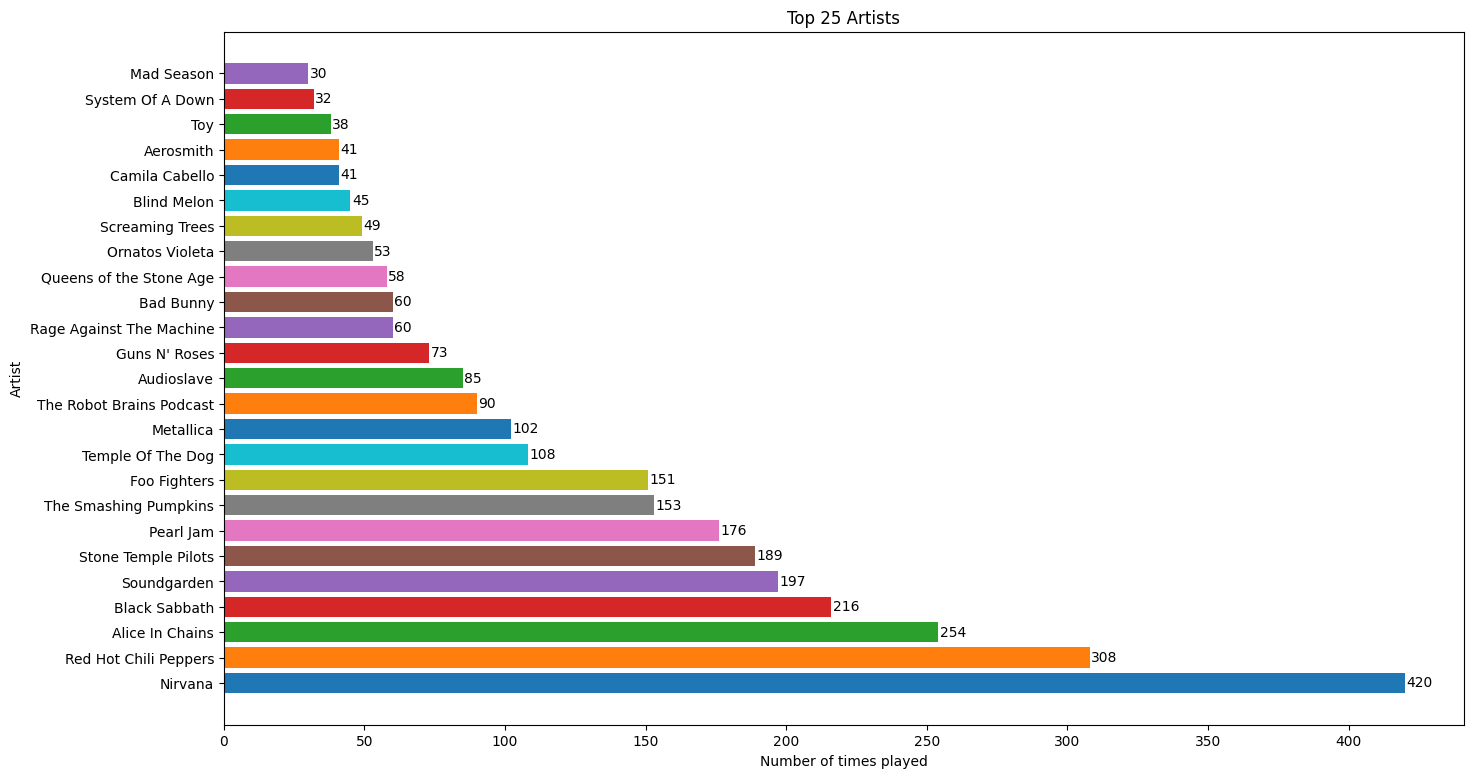

In [12]:
TOPARTISTS = 25

artists = np.asarray(Counter(df['Band']).most_common(TOPARTISTS))

fig, ax = plt.subplots(figsize =(16, 9))

plt.title('Top ' + str(TOPARTISTS) + ' Artists')

for artist, quant in zip(artists[:,0], artists[:,1]):
    ax.barh(artist,int(quant))

for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.25, str(round((i.get_width()), 2)), fontweight ='light')

plt.xlabel('Number of times played')
plt.ylabel('Artist')
plt.show()


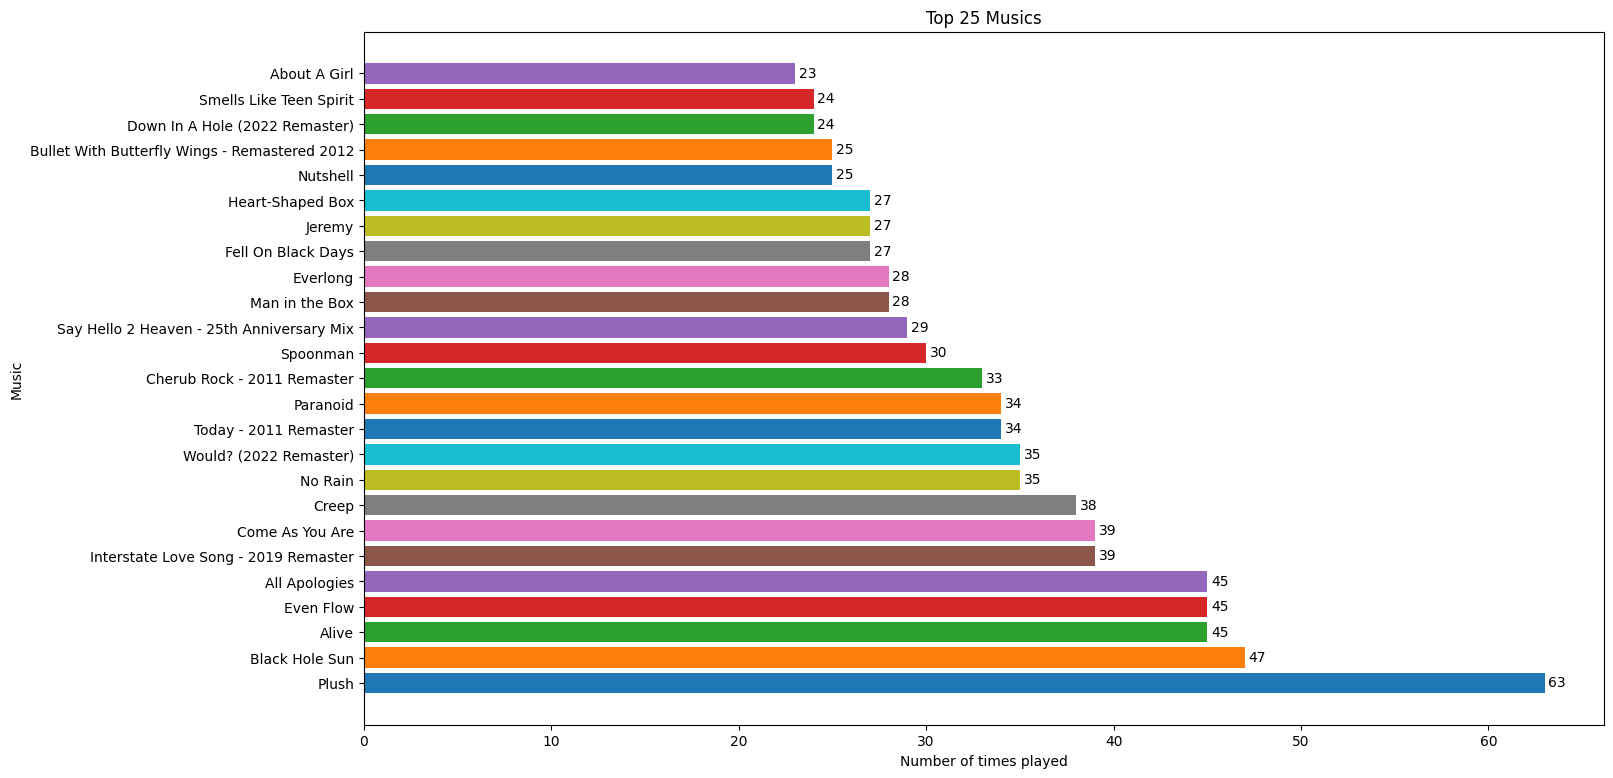

In [13]:
TOPSONGS = 25

musics = np.asarray(Counter(df['Track']).most_common(TOPSONGS))
fig, ax = plt.subplots(figsize =(16, 9))
plt.title('Top ' + str(TOPSONGS) + ' Musics')

for track, quant in zip(musics[:,0], musics[:,1]):
    ax.barh(track,int(quant))

for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.25, str(round((i.get_width()), 2)), fontweight ='light')

plt.xlabel('Number of times played')
plt.ylabel('Music')
plt.show()

In [14]:
seconds = df['Duration'].sum()*10**-3
print('Seconds:',seconds)
min = seconds/60
print('Minutes:',min)
hours = min/60
print('Hours:',hours)
days = hours/24
print('Days:',days)

Seconds: 1429371.511
Minutes: 23822.858516666667
Hours: 397.0476419444445
Days: 16.543651747685185


TODO:
- tirar podcasts
- labels nos bar plots
- time plot
- convert time bem
- try webscrapping (put a photo of the band for the name searched)